In [26]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import mne
import os, sys
import pickle
from IPython.display import clear_output
import torch
from neuro_transformers import  train_ecoghubert, ecoghubert_predict, ECoGHuBERT
from scipy.signal import correlate

In [2]:
preds = np.load('./checkpoints/model_predictions_subject_1.npy', allow_pickle=True)
sylber_data = np.load('./pickled_podcast/outputs.pkl', allow_pickle=True)
HIDDEN_STATES = sylber_data['hidden_states']
sylber_segments = sylber_data['segments']; del sylber_data

In [ ]:
model, (test_X, test_y) = train_ecoghubert(sub_num=1,
                                           train_ratio=0.8,
                                           save_folder='doodoo',
                                           hidden_states=HIDDEN_STATES,
                                           chunk_len=100, # 1 seconds at 50Hz
                                           n_epochs=150)

In [8]:
from neuro_transformers import  ecoghubert_predict
predictions_np = ecoghubert_predict(model, test_X, test_y).numpy()

Predicting:   0%|          | 0/23 [00:00<?, ?it/s]

Predicting: 100%|██████████| 23/23 [00:00<00:00, 50.73it/s]


In [28]:
preds= predictions_np.reshape(-1, predictions_np.shape[-1])
preds.shape, test_y.shape

((18000, 768), (18000, 768))

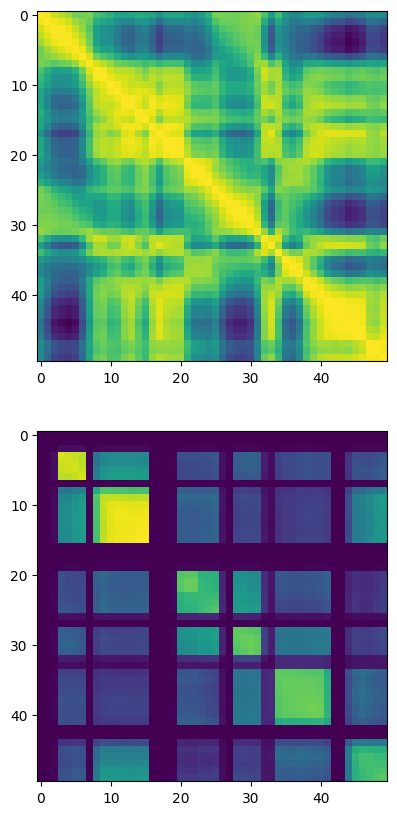

In [25]:
f, (a0, a1) = plt.subplots(2, 1,figsize=(5,10))
test_start_time = 1440.0
s, e = 1479., 1480

def time_to_rel_idx(t, start=test_start_time, sr=50):
    return int((t - start) * sr)

frame_start, frame_end = time_to_rel_idx(s), time_to_rel_idx(e)

X_frame = preds[frame_start: frame_end]
y_frame = test_y[frame_start: frame_end]

a0.imshow(X_frame@X_frame.T)
a1.imshow(y_frame@y_frame.T)

# PREDICTING SYLLABLE BOUNDARIES